# Import Packages

In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Capstone/Try/Dataset_TanamPintar'
os.listdir(path)

['train', 'val', 'test']

In [ ]:
train_dir = os.path.join(path, 'train')
val_dir = os.path.join(path, 'val')
test_dir = os.path.join(path, 'test')

In [ ]:
soil_types = os.listdir(train_dir)
soil_types.sort()
soil_types

['Alluvial soil', 'Black soil', 'Clay soil', 'Red soil']

In [ ]:
for i in os.listdir(train_dir):
  print(f"There are {len(os.listdir(os.path.join(train_dir, i)))} in {i}")

There are 517 in Alluvial soil
There are 216 in Clay soil
There are 308 in Red soil
There are 284 in Black soil


In [ ]:
for i in os.listdir(val_dir):
  print(f"There are {len(os.listdir(os.path.join(val_dir, i)))} in {i}")

There are 64 in Alluvial soil
There are 28 in Clay soil
There are 39 in Red soil
There are 34 in Black soil


In [ ]:
for i in os.listdir(test_dir):
  print(f"There are {len(os.listdir(os.path.join(val_dir, i)))} in {i}")

There are 64 in Alluvial soil
There are 28 in Clay soil
There are 39 in Red soil
There are 34 in Black soil


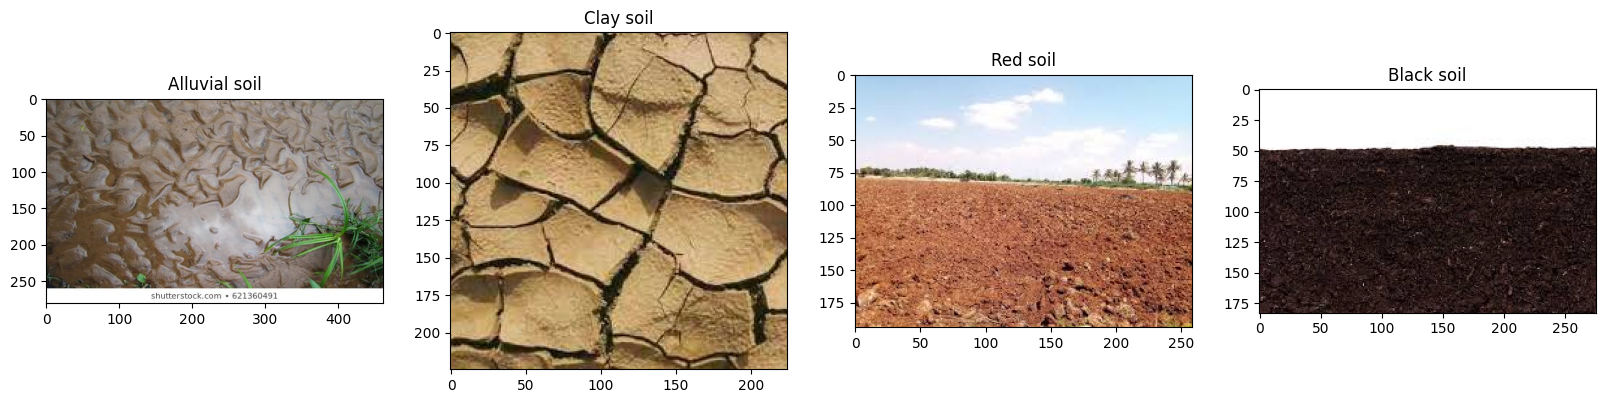

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(4 * 5, 5))
for i, folder in enumerate(os.listdir(train_dir)):
    item_path = os.path.join(train_dir, folder)
    sample_image = load_img(f'{os.path.join(item_path, os.listdir(item_path)[0])}')
    axs[i].imshow(sample_image)
    axs[i].set_title(f'{folder}')
plt.show()

# Image Augmentation

In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(train_dir, batch_size=32, target_size=(224, 224))

validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(directory=val_dir, batch_size=32, target_size=(224, 224))

test_datagen = ImageDataGenerator(rescale=1.0/255.)
test_generator = test_datagen.flow_from_directory(directory=test_dir, batch_size=32, target_size=(224, 224))

Found 1325 images belonging to 4 classes.
Found 165 images belonging to 4 classes.
Found 178 images belonging to 4 classes.


# Building and Training Model

In [ ]:
MobileNetV2_model = tf.keras.applications.MobileNetV2(input_shape=(224,224,3), include_top=False, weights='imagenet')

In [ ]:
MobileNetV2_model.trainable = False

In [ ]:
model = tf.keras.Sequential([
    MobileNetV2_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.build((None,)+(224, 224)+(3,))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten_1 (Flatten)         (None, 62720)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               8028288   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 516       
                                                                 
Total params: 10286788 (39.24 MB)
Trainable params: 8028804 (30.63 MB)
Non-trainable params: 2257984 (8.61 MB)
_________

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
do_fine_tuning = False

In [ ]:
Callback = tf.keras.callbacks.ModelCheckpoint("/content/drive/MyDrive/Capstone/Try/Model_TanamPintar/Model_Fix.h5",
                                             monitor='accuracy',
                                             verbose=1,
                                             save_best_only=True,
                                             mode='max'
                                             )

Early_Stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

In [ ]:
number_of_epochs = 50
history = model.fit(train_generator,
          validation_data=validation_generator,
          epochs=number_of_epochs,
          callbacks=[Callback, Early_Stopping],
          verbose=1)

Epoch 1/50
42/42 [==============================] - ETA: 0s - loss: 4.6743 - accuracy: 0.6347 
Epoch 1: accuracy improved from -inf to 0.63472, saving model to /content/drive/MyDrive/Capstone/Try/Model_TanamPintar/Model_Fix.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


42/42 [==============================] - 640s 15s/step - loss: 4.6743 - accuracy: 0.6347 - val_loss: 0.6062 - val_accuracy: 0.7758
Epoch 2/50
42/42 [==============================] - ETA: 0s - loss: 0.5623 - accuracy: 0.7985
Epoch 2: accuracy improved from 0.63472 to 0.79849, saving model to /content/drive/MyDrive/Capstone/Try/Model_TanamPintar/Model_Fix.h5
42/42 [==============================] - 87s 2s/step - loss: 0.5623 - accuracy: 0.7985 - val_loss: 0.5536 - val_accuracy: 0.8121
Epoch 3/50
42/42 [==============================] - ETA: 0s - loss: 0.4443 - accuracy: 0.8400
Epoch 3: accuracy improved from 0.79849 to 0.84000, saving model to /content/drive/MyDrive/Capstone/Try/Model_TanamPintar/Model_Fix.h5
42/42 [==============================] - 88s 2s/step - loss: 0.4443 - accuracy: 0.8400 - val_loss: 0.5625 - val_accuracy: 0.8000
Epoch 4/50
42/42 [==============================] - ETA: 0s - loss: 0.3799 - accuracy: 0.8687
Epoch 4: accuracy improved from 0.84000 to 0.86868, saving 

##  Model Performance

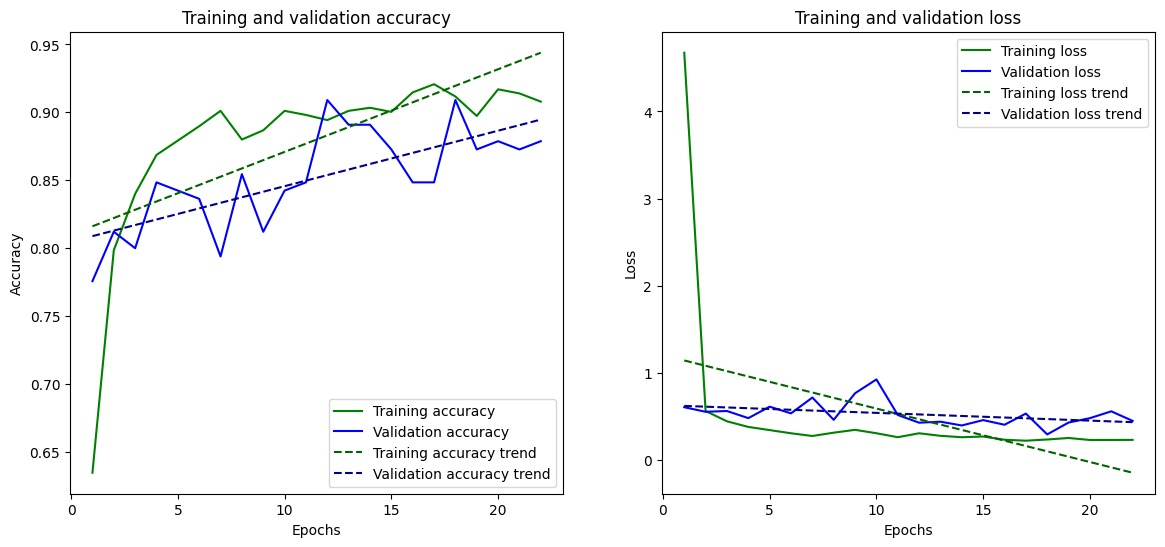

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

def plot_linear_trend(x, y, ax, color, label):
    coeffs = np.polyfit(x, y, 1)  # Koefisien untuk garis linear
    linear_trend = np.polyval(coeffs, x)
    ax.plot(x, linear_trend, color, linestyle='--', label=label)

plt.figure(figsize=(14, 6))

ax1 = plt.subplot(1, 2, 1)
ax1.plot(epochs, acc, 'g-', label='Training accuracy')
ax1.plot(epochs, val_acc, 'b-', label='Validation accuracy')
plot_linear_trend(epochs, acc, ax1, 'darkgreen', 'Training accuracy trend')
plot_linear_trend(epochs, val_acc, ax1, 'darkblue', 'Validation accuracy trend')
ax1.set_title('Training and validation accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2 = plt.subplot(1, 2, 2)
ax2.plot(epochs, loss, 'g-', label='Training loss')
ax2.plot(epochs, val_loss, 'b-', label='Validation loss')
plot_linear_trend(epochs, loss, ax2, 'darkgreen', 'Training loss trend')
plot_linear_trend(epochs, val_loss, ax2, 'darkblue', 'Validation loss trend')
ax2.set_title('Training and validation loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.show()

# Predict, Evaluate, Testing Model

In [ ]:
model.evaluate(test_generator)

6/6 [==============================] - 64s 12s/step - loss: 0.7125 - accuracy: 0.8034


[0.7125285863876343, 0.8033707737922668]

In [ ]:
model_path = "/content/drive/MyDrive/Capstone/Try/Model_TanamPintar/Model_Fix.h5"

model = tf.keras.models.load_model(model_path)

def img_test(path):
    img = load_img(path, target_size=(224, 224))
    x = img_to_array(img)
    x = tf.expand_dims(x, axis=0) / 255.
    classes = model.predict(x, batch_size=32).argmax(axis=1)
    return classes[0]

soil_types = os.listdir(test_dir)
soil_types.sort()

acc = []
false = []
correct = []

for count, name in enumerate(soil_types):
    path = os.path.join(test_dir, name)
    print(f"Folder name : {path}")
    path_value = os.listdir(path)
    path_value.sort()

    false_acc = 0
    correct_acc = 0
    pred_list = []

    for i in path_value:
        file = os.path.join(path, i)
        pred = img_test(file)
        pred_list.append(pred)

        if pred != count:
            false_acc += 1
        else:
            correct_acc += 1

    total_images = len(path_value)
    accuracy = correct_acc / total_images
    print(f"There're {correct_acc} correct predictions from total of {total_images} images.")
    print(f"Accuracy : {accuracy}")

    false.append(false_acc)
    correct.append(correct_acc)
    acc.append(accuracy)

print("Accuracies:", acc)
print("False predictions count:", false)
print("Correct predictions count:", correct)

Folder name : /content/drive/MyDrive/Capstone/Try/Dataset_TanamPintar/test/Alluvial soil
1/1 [==============================] - 0s 51ms/step
There're 63 correct predictions from total of 70 images.
Accuracy : 0.9
Folder name : /content/drive/MyDrive/Capstone/Try/Dataset_TanamPintar/test/Black soil
1/1 [==============================] - 0s 68ms/step
There're 27 correct predictions from total of 37 images.
Accuracy : 0.7297297297297297
Folder name : /content/drive/MyDrive/Capstone/Try/Dataset_TanamPintar/test/Clay soil
1/1 [==============================] - 0s 79ms/step
There're 23 correct predictions from total of 27 images.
Accuracy : 0.8518518518518519
Folder name : /content/drive/MyDrive/Capstone/Try/Dataset_TanamPintar/test/Red soil
1/1 [==============================] - 0s 49ms/step
There're 37 correct predictions from total of 44 images.
Accuracy : 0.8409090909090909
Accuracies: [0.9, 0.7297297297297297, 0.8518518518518519, 0.8409090909090909]
False predictions count: [7, 10, 4, 7

# Load Model

In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/Capstone/Try/Model_TanamPintar/Model_Fix.h5")

In [ ]:
tf.saved_model.save(model, "/content/drive/MyDrive/Capstone/Try/Model_TanamPintar/Model_Fix_new.h5")

# Convert Model to JSON

In [ ]:
# !pip install tensorflowjs

In [ ]:
# !tensorflowjs_converter --input_format=keras --output_format=tfjs_layers_model "/content/drive/MyDrive/Capstone/Try/Model_TanamPintar/Model_Fix.h5" "/content/drive/MyDrive/Capstone/Try/Model_TanamPintar/Model_Fix_JSON"

2024-06-18 12:46:28.241476: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-18 12:46:31.013543: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
